In [1]:
import sys
sys.path.insert(0,'..')
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import glia
from glia.config import channel_map
import pandas as pd
from importlib import reload
import csv
import seaborn as sns
from scipy import signal
import numpy as np
import scipy
import os
import sys
import traceback
import glia
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn import datasets, svm, metrics, neighbors
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import os
from functools import reduce, partial
from scipy import stats
from pathlib import Path
from tqdm.auto import tqdm
reload(glia)
from sklearn.decomposition import PCA
from scipy.stats import vonmises
from scipy.signal import chirp
import math
from glia import huntm_python_utils as hpu
%load_ext autoreload
%autoreload 2

/Users/matthewhunt/.pyenv/versions/3.7.5/envs/cs231n/lib/python3.7/site-packages/elephant/pandas_bridge.py:22: DeprecationWarning: pandas_bridge module will be removed in Elephant v0.8.x
  DeprecationWarning)


In [2]:
plt.rcParams["font.size"] = 18
data_dir = "/Users/matthewhunt/Coding/Seattle_Research/MEA_Project/clustering_data/"


fig_dict = {}
fig_dict["plot_name"] = "R1_E2_AMES_120min_celltyping"
fig_dict["filename"] = data_dir + "R1_E2_AMES_120min_celltyping"
fig_dict["notebook"] = data_dir + "lab notebook.yaml"

In [3]:
name = fig_dict["plot_name"]
filename = fig_dict["filename"]
notebook = fig_dict["notebook"]

data_directory, data_name = os.path.split(filename)
lab_notebook = glia.open_lab_notebook(fig_dict["notebook"])

name, extension = os.path.splitext(data_name)
stimulus_file = os.path.join(data_directory, name + ".stim")
metadata, stimulus_list, method = glia.read_stimulus(stimulus_file)


In [4]:
channel_map = glia.config.channel_map_3brain
spikes = glia.read_3brain_spikes(Path(data_directory) / (name +".bxr"), name, channel_map)

In [5]:
spikes['R1_E2_AMES_120min_celltyping_(29, 33)_0'].spike_train

array([1.68154488e-04, 2.19677023e+00, 2.75924699e+00, ...,
       5.93314894e+02, 5.93588201e+02, 5.96345262e+02])

In [7]:
celltyping_responses,celltyping_responses_fullfield,celltyping_responses_noise = hpu.separate_spikes_into_celltyping_responses(stimulus_list,spikes)


  0%|          | 0/4009 [00:00<?, ?it/s]

Applying pipeline


100%|██████████| 4009/4009 [00:54<00:00, 73.04it/s] 


Applying pipeline
Applying pipeline


In [8]:
most_selective_units,kappas,celltyping_responses_bar =  hpu.preprocess_celltyping_bar(celltyping_responses)

Applying pipeline
kappa dict was loaded


WAIT
SOLID
WAIT
SOLID
CHIRP
WAIT
CHIRP
WAIT
WAIT
SOLID
WAIT
SOLID
WAIT
WAIT
SOLID
WAIT
SOLID
CHIRP
WAIT
CHIRP
WAIT
WAIT
SOLID
WAIT
SOLID
WAIT


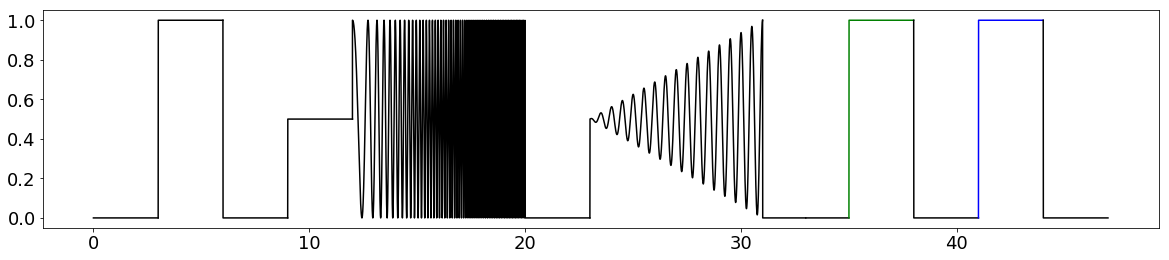

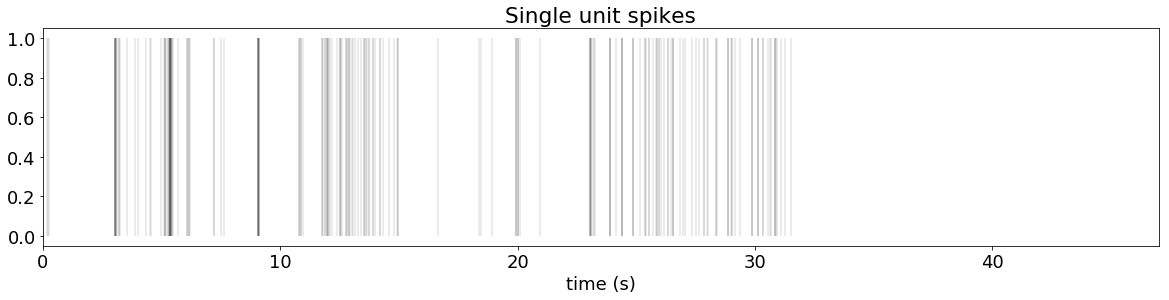

the area under the gaussian is indeed 0.9999999980268616
WAIT
SOLID
WAIT
SOLID
CHIRP
WAIT
CHIRP
WAIT
WAIT
SOLID
WAIT
SOLID
WAIT
chop times are [7500, 21500, 32000, 34000, 39500]
the length of sum of split arrays is 47000
WAIT
SOLID
WAIT
SOLID
CHIRP
WAIT
CHIRP
WAIT
WAIT
SOLID
WAIT
SOLID
WAIT
chop times are [7500, 21500, 32000, 34000, 39500]
the length of sum of split arrays is 47000
g
b


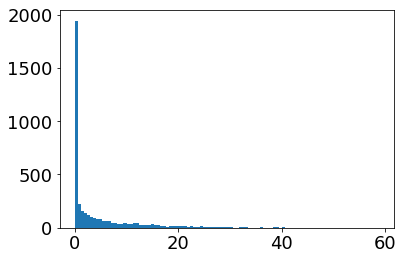

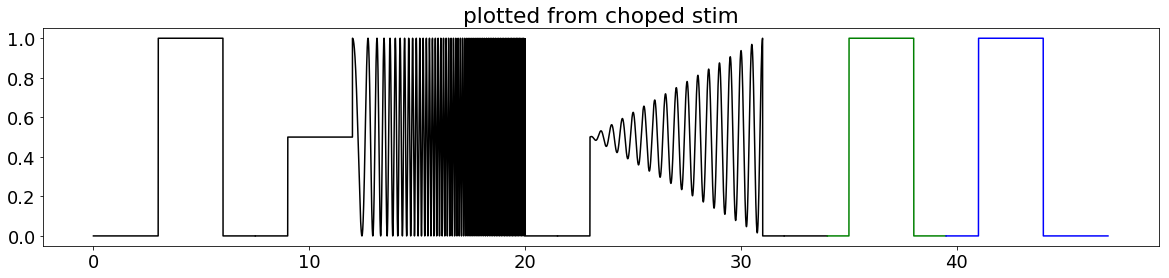

In [9]:
#Show the Stimulus and an example cell
unit = celltyping_responses_fullfield[most_selective_units[-2][0]]
stimulus_plot_list,fullfield_stim_duration = hpu.get_stimulus_plot_list(unit)
hpu.plot_stimulus_and_unit_response(unit)

#Make teh firing rate arrays and filtered version
rgcs,ifr,kappa = hpu.make_rgc_irf_kappa_arrays(celltyping_responses_fullfield,kappas,fullfield_stim_duration,bin_width = 0.001, bandwidth = 0.3,sigma = 6)
f_ifr,f_kappa = hpu.filter_nonfiring_cells(ifr,kappa)

#Chop arrays and the stimulus info at each "wait" block
unit = celltyping_responses_fullfield[most_selective_units[-2][0]]
ifr_segment_list,chop_times = hpu.split_stimulus_array(ifr,unit)
f_ifr_segment_list,chop_times = hpu.split_stimulus_array(f_ifr,unit)
chopped_plt_list = hpu.split_plot_list_by_chops(stimulus_plot_list,chop_times)
plt.figure(figsize=(20,4))
for i in range(len(chopped_plt_list[0])):
    plt.plot(chopped_plt_list[0][i],chopped_plt_list[1][i],color = chopped_plt_list[2][i])
    plt.title('plotted from choped stim')

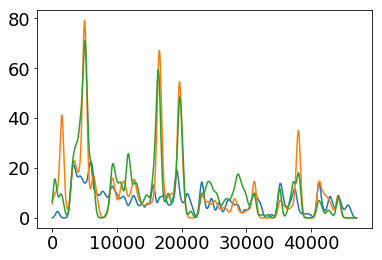

In [9]:
for i in range(3):
    plt.plot(f_ifr[i,:])

In [12]:
def scatter(data_in):
    plt.figure(figsize=(15,15))
    plt.scatter(data_in[:,0],data_in[:,1],s=3)
    plt.show()

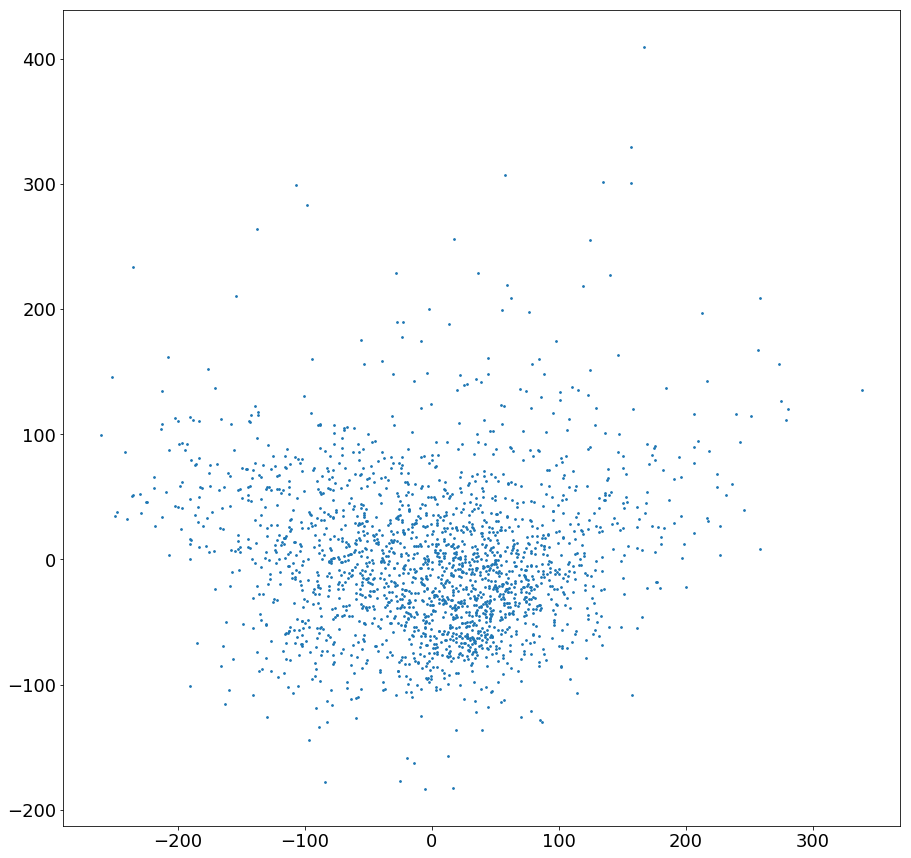

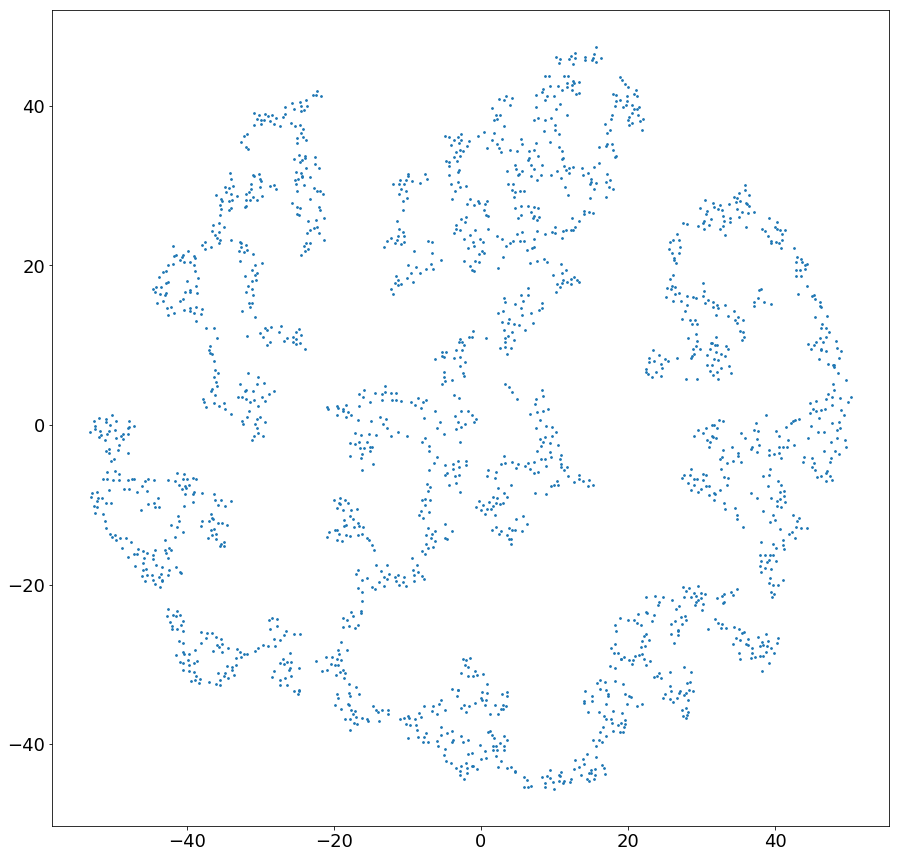

In [103]:
n_f_ifr = hpu.normalize_cell_firing(np.concatenate([f_ifr_segment_list[i] for i in range(6)],axis=1))

n_f_ifr_pca = PCA(3).fit_transform(n_f_ifr)
scatter(n_f_ifr_pca)
n_f_ifr_pca_embedded = TSNE(n_components=2,perplexity=30,metric='cosine').fit_transform(n_f_ifr_pca)
scatter(n_f_ifr_pca_embedded)


## First, naievely try TSNE on the unfiltered and non-reduced data

In [9]:
#ifr_embedded = TSNE(n_components=2).fit_transform(ifr)

## Next, on filtered, non-reduced data

In [ ]:
f_ifr_embedded

## Next, on PCA-reduced filtered data

In [35]:
f_ifr_pca = PCA(50).fit_transform(f_ifr)

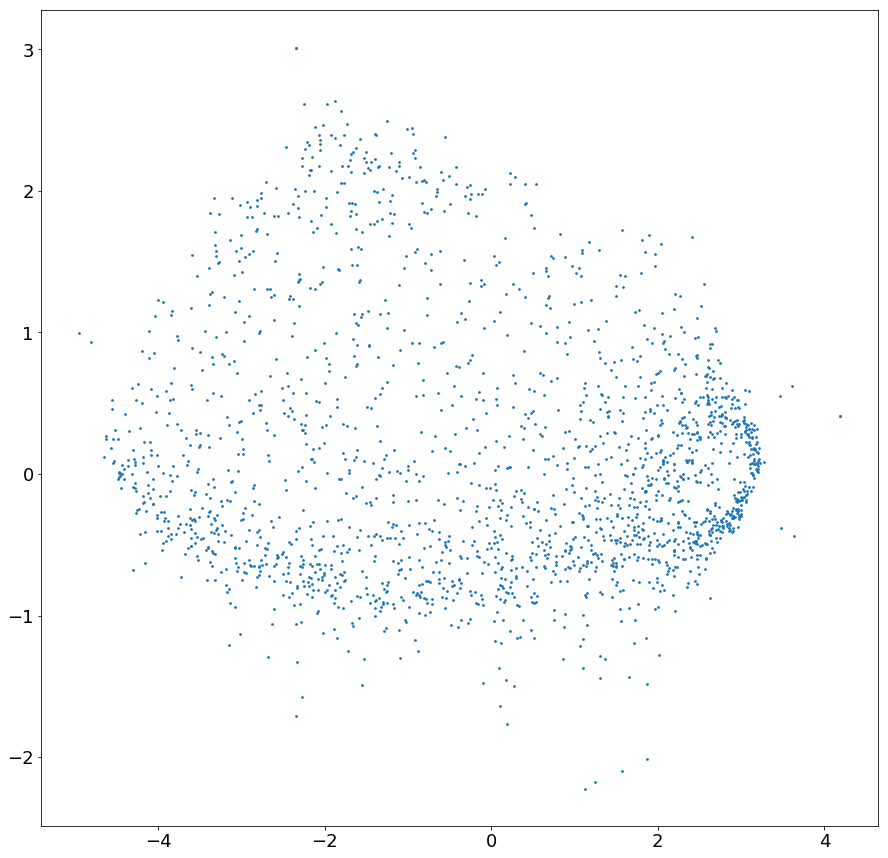

In [28]:
f_ifr_pca_embedded = TSNE(n_components=2,perplexity=1000).fit_transform(f_ifr_pca)
scatter(f_ifr_pca_embedded)

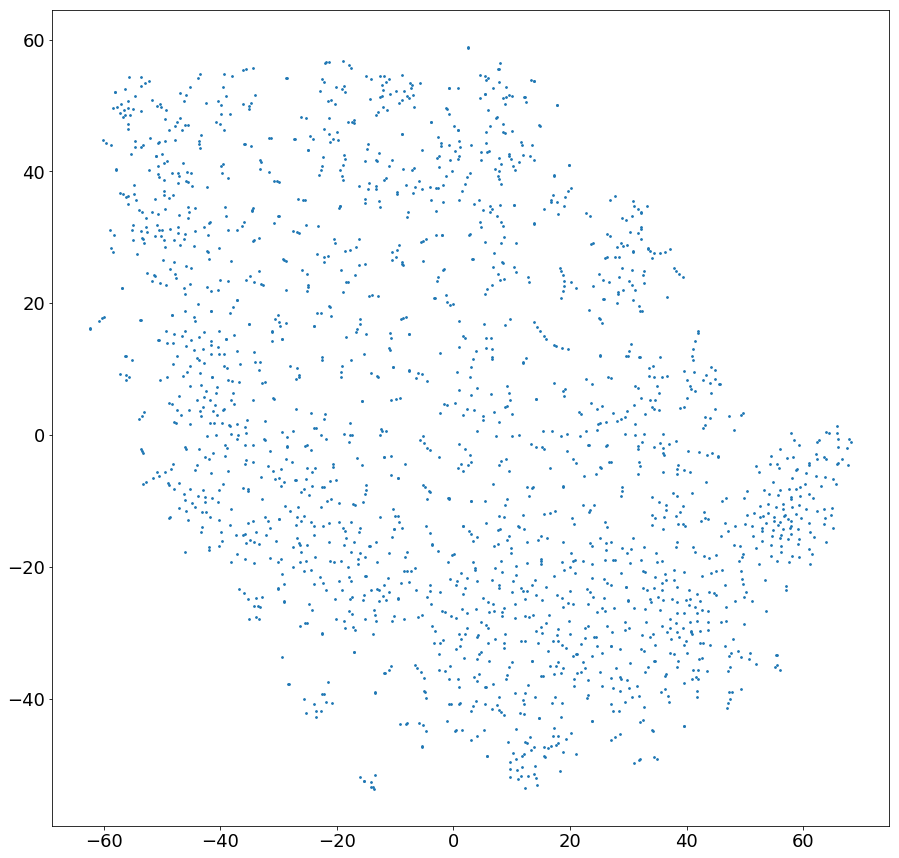

In [38]:
f_ifr_pca_embedded = TSNE(n_components=2,perplexity=20).fit_transform(f_ifr_pca)
scatter(f_ifr_pca_embedded)

## Normalized, filtered pca'ed data

In [43]:
n_f_ifr = hpu.normalize_cell_firing(f_ifr)
n_f_ifr_pca = PCA(50).fit_transform(n_f_ifr)

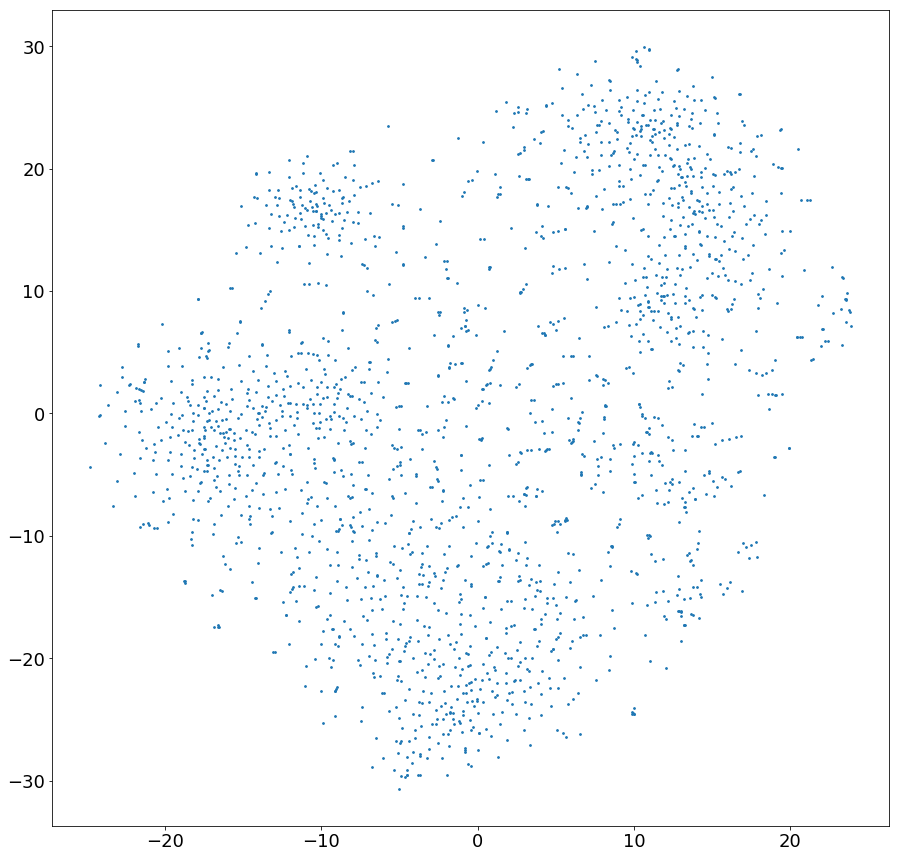

In [47]:
n_f_ifr_pca_embedded = TSNE(n_components=2,perplexity=80,metric='cosine').fit_transform(n_f_ifr_pca)
scatter(n_f_ifr_pca_embedded)

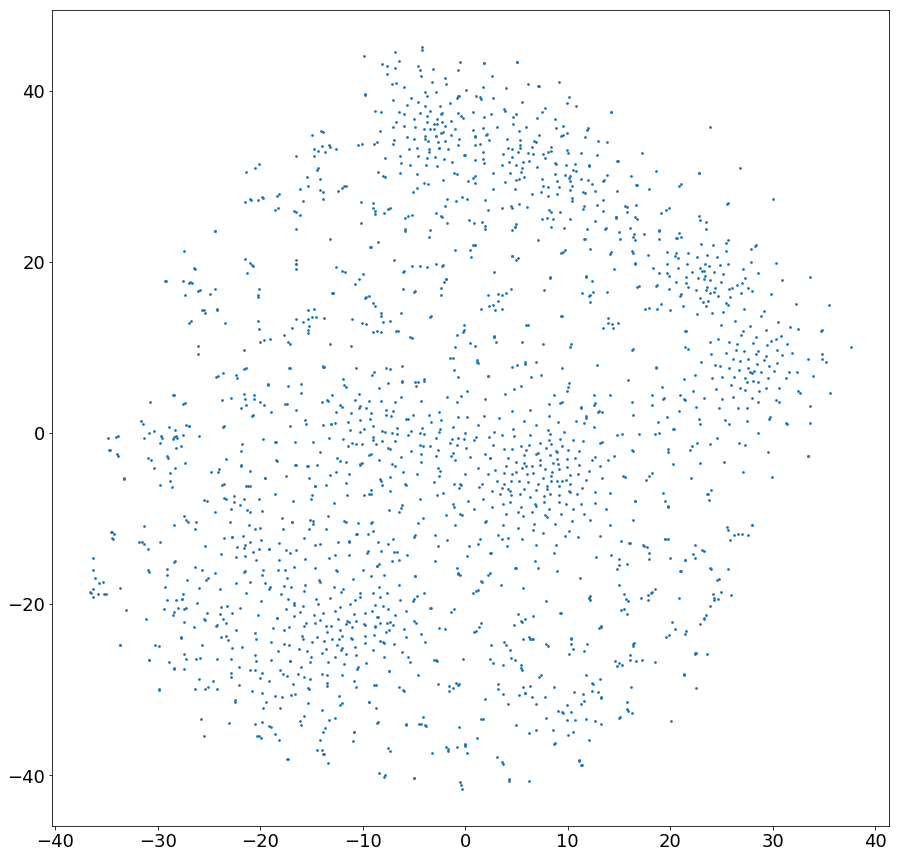

In [49]:
n_f_ifr = hpu.normalize_cell_firing(f_ifr)
n_f_ifr_pca = PCA(200).fit_transform(n_f_ifr)
n_f_ifr_pca_embedded = TSNE(n_components=2,perplexity=50,metric='cosine').fit_transform(n_f_ifr_pca)
scatter(n_f_ifr_pca_embedded)

# Best Result so far

Normalized firing, PCA to 3 dimensions, cosine distance, perplexity around 30 is good.

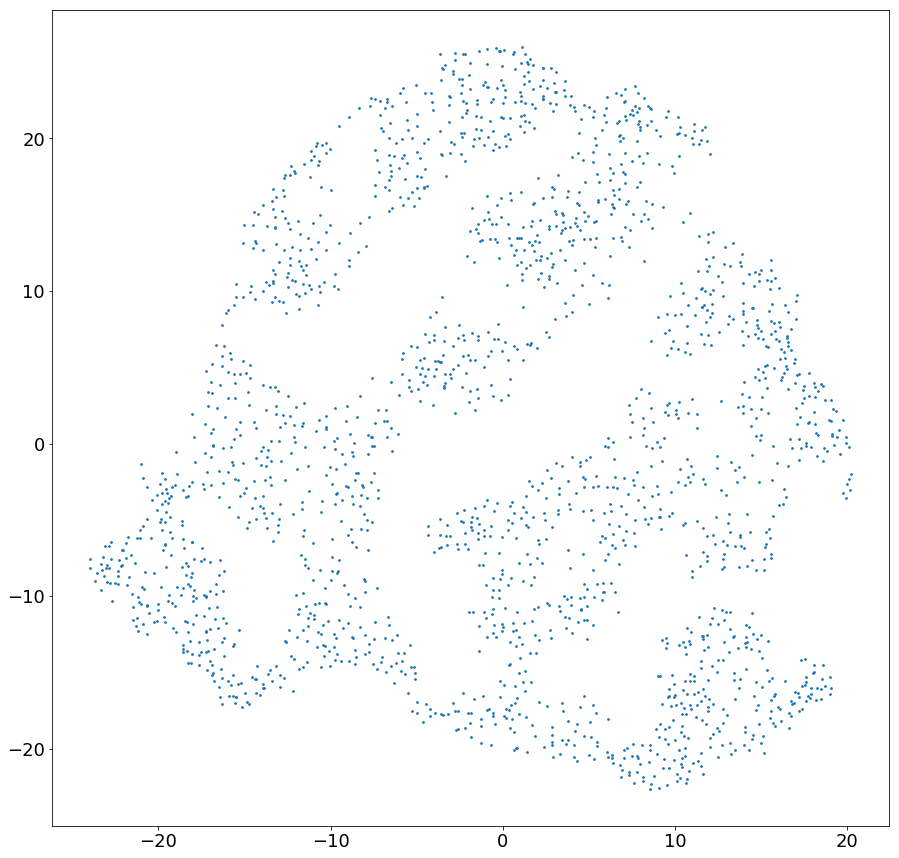

In [23]:
n_f_ifr = hpu.normalize_cell_firing(f_ifr)

n_f_ifr_pca = PCA(3).fit_transform(n_f_ifr)
n_f_ifr_pca_embedded = TSNE(n_components=2,perplexity=100,metric='cosine').fit_transform(n_f_ifr_pca)
scatter(n_f_ifr_pca_embedded)


In [72]:
f_ifr_segment_list[0].shape

(2068, 7500)

# On to UMAP

In [18]:
import umap

def plot_umap(data,umap_parameters,data_params):
    up = umap_parameters
    dp = data_params
    reducer = umap.UMAP(n_neighbors = up['n_neighbors'],
                       min_dist = up['min_dist'],
                       n_components = up['n_components'],
                       metric = up['metric'])
    if dp['normalize_firing']:
        data = hpu.normalize_cell_firing(data)
    if dp['pre_pca'] is not False:
        data = PCA(dp['pre_pca']).fit_transform(data)
    n_f_ifr_embedded = reducer.fit_transform(data)
    scatter(n_f_ifr_embedded)


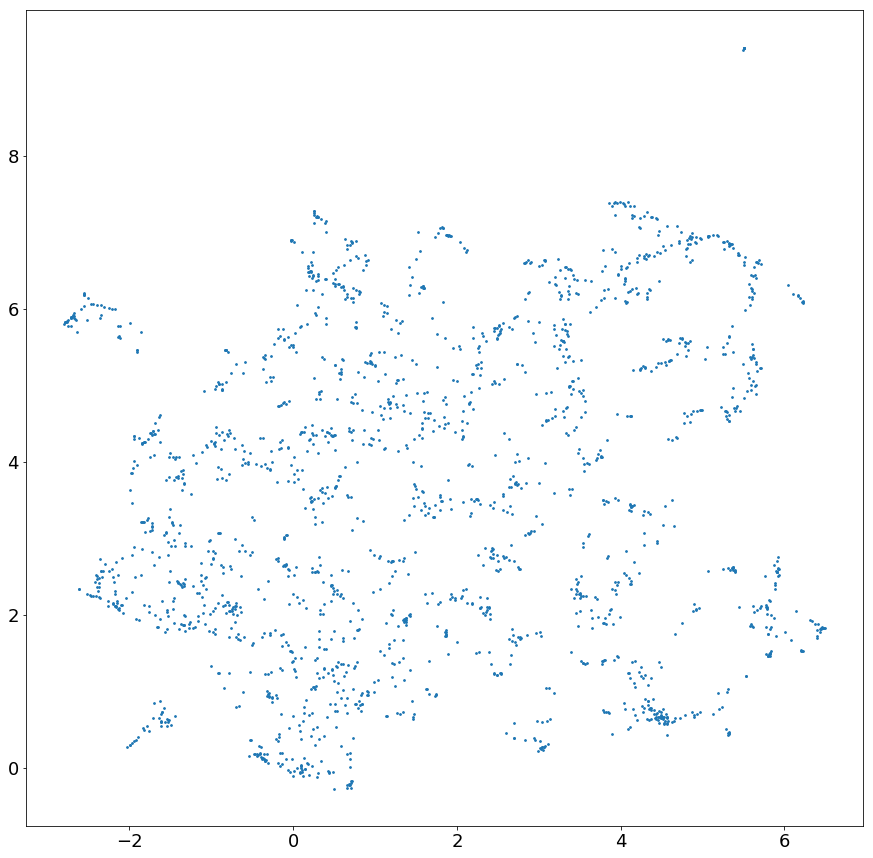

In [33]:
data = f_ifr
umap_parameters = {'n_neighbors':5,
                  'min_dist':0.0,
                  'n_components':2,
                  'metric':'cosine'}
data_params = {'normalize_firing':True,
              'pre_pca':False}

plot_umap(data,umap_parameters,data_params)

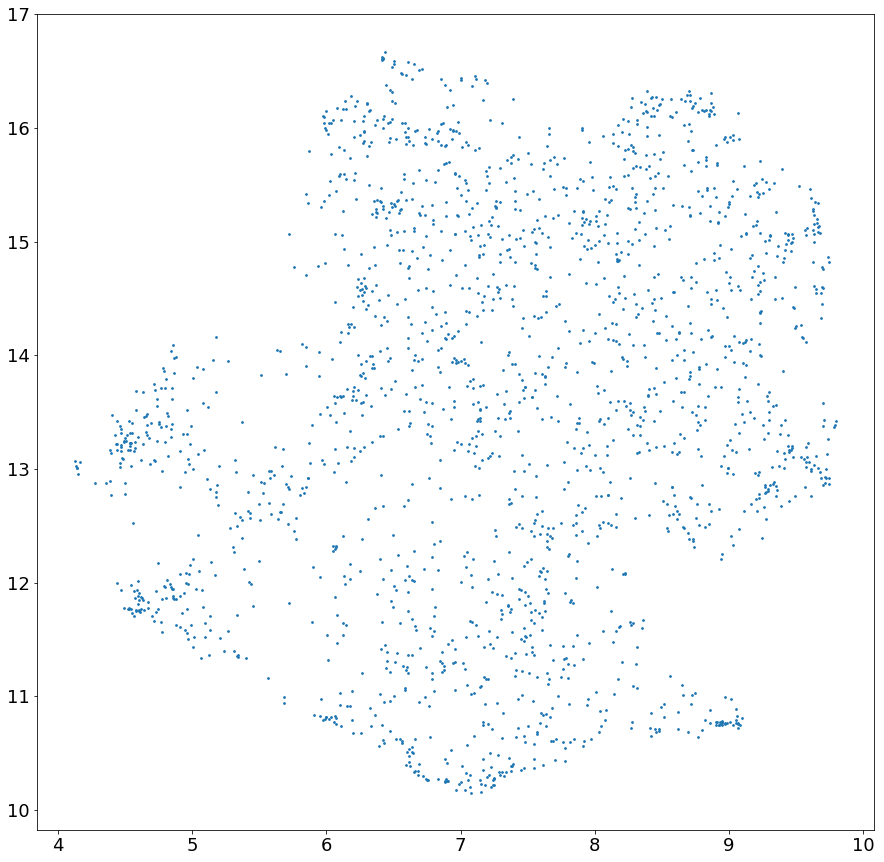

In [32]:
data = f_ifr
umap_parameters = {'n_neighbors':40,
                  'min_dist':0.0,
                  'n_components':2,
                  'metric':'cosine'}
data_params = {'normalize_firing':True,
              'pre_pca':False}

plot_umap(data,umap_parameters,data_params)

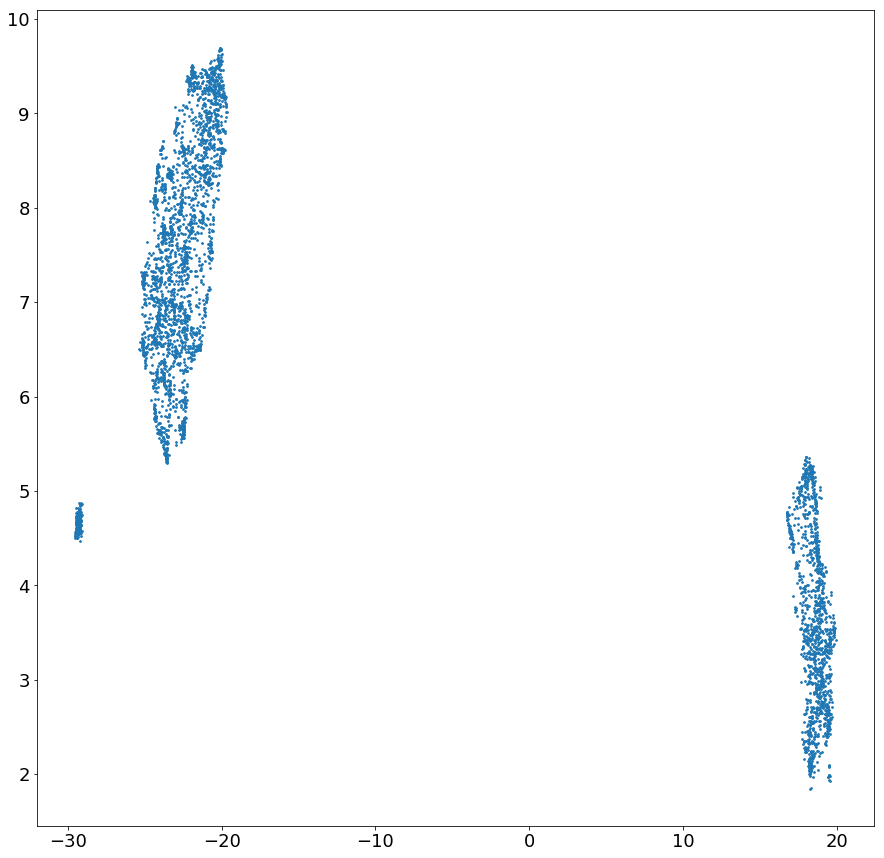

In [52]:
data = ifr
umap_parameters = {'n_neighbors':70,
                  'min_dist':0.0,
                  'n_components':2,
                  'metric':'cosine'}
data_params = {'normalize_firing':False,
              'pre_pca':50}

plot_umap(data,umap_parameters,data_params)

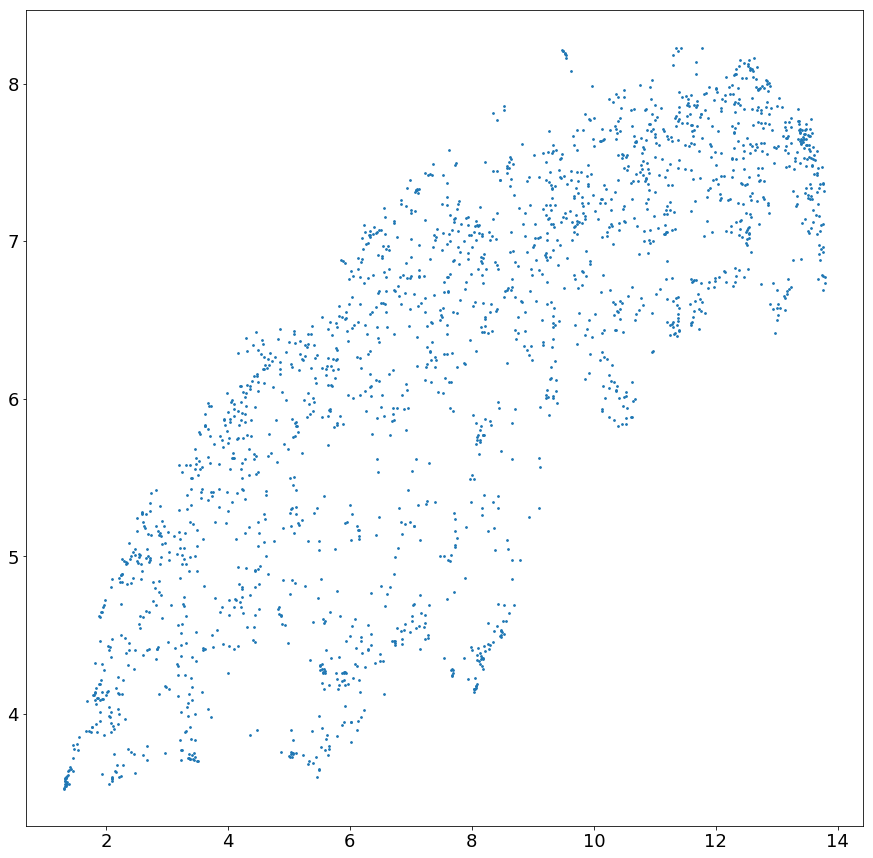

In [29]:
data = f_ifr
umap_parameters = {'n_neighbors':20,
                  'min_dist':0.0,
                  'n_components':2,
                  'metric':'euclidean'}
data_params = {'normalize_firing':False,
              'pre_pca':False}

plot_umap(data,umap_parameters,data_params)

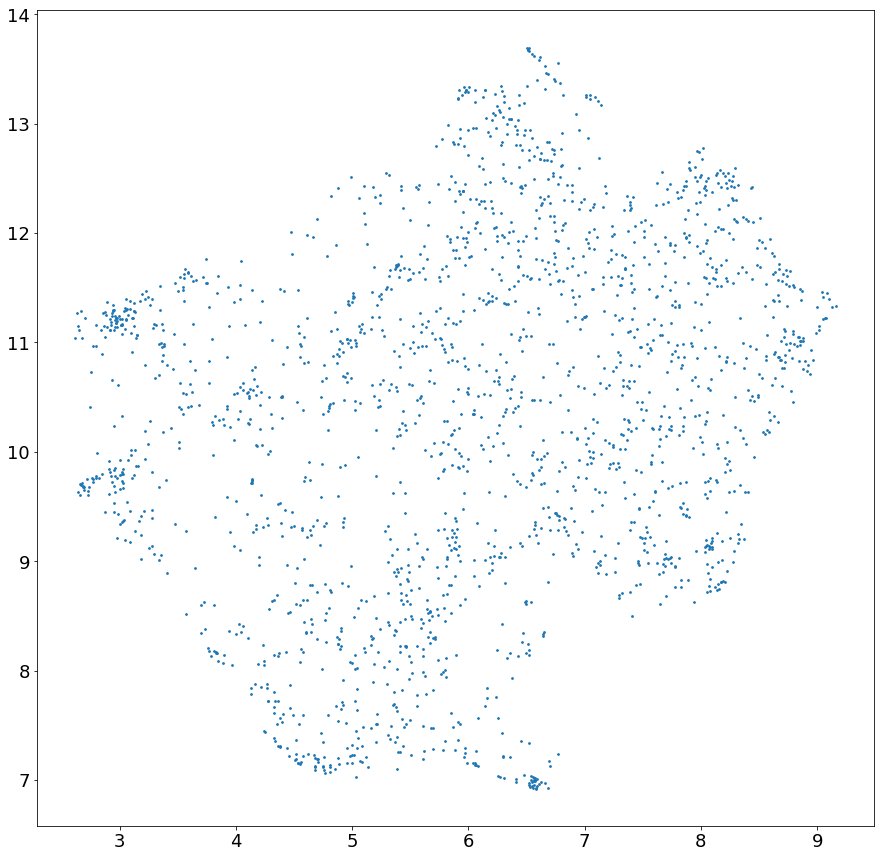

In [30]:
data = f_ifr
umap_parameters = {'n_neighbors':20,
                  'min_dist':0.0,
                  'n_components':2,
                  'metric':'euclidean'}
data_params = {'normalize_firing':True,
              'pre_pca':False}

plot_umap(data,umap_parameters,data_params)

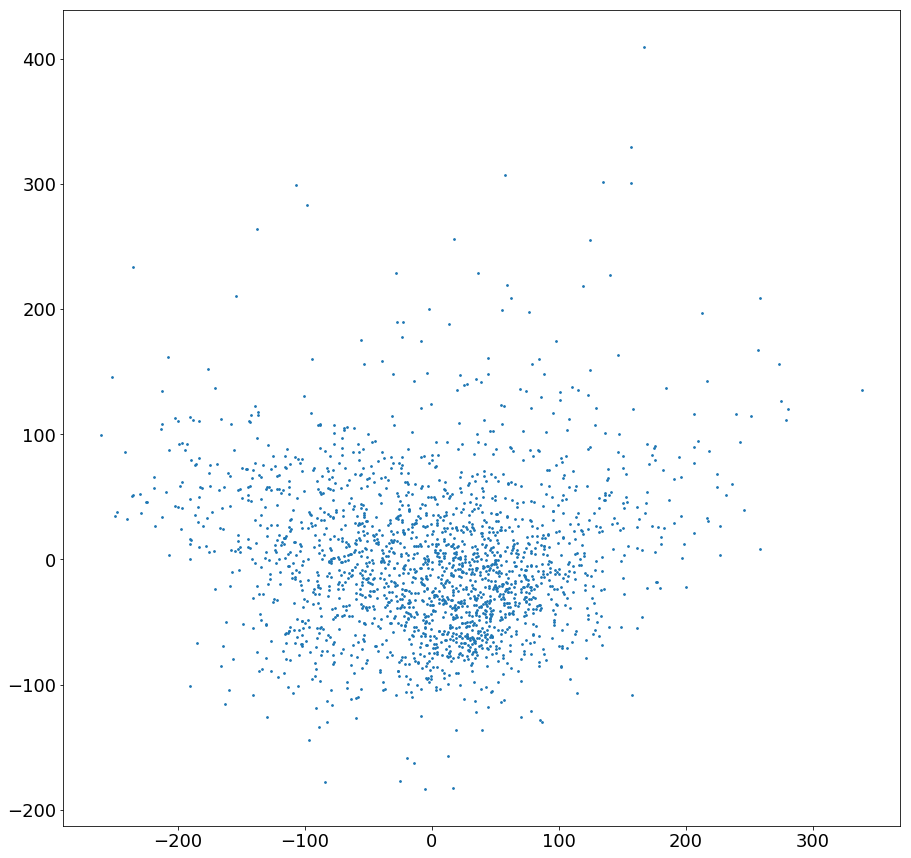

In [17]:
scatter(PCA(3).fit_transform(hpu.normalize_cell_firing(data)))